In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Binary.csv",index_col=0)
df.head()

,x,y,label
0,14,7,0
1,26,7,0
2,42,26,0
3,22,25,0
4,37,17,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       333 non-null    int64
 1   y       333 non-null    int64
 2   label   333 non-null    int64
dtypes: int64(3)
memory usage: 10.4 KB


In [4]:
df['label'].value_counts()

1    179
0    154
Name: label, dtype: int64

### Identifying Input and Output 

In [5]:
# Input features 
x = df.iloc[:,0:2]

# Output feature
y = df.iloc[:,2].astype(int)

### Splitting into train and test 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [7]:
x_train.shape

(283, 2)

In [8]:
x_test.shape


(50, 2)

### Standardizing numerical features


In [9]:
# As it is Numerical features in different scaling therefore applying Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

### Building Logical structure 

In [10]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD

In [34]:
model = Sequential()
model.add(Dense(10,activation='tanh',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim = 2))
model.add(Dense(8,activation='tanh',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(5,activation='tanh',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [35]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 5)                 45        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model 

In [36]:
model.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=0.1),metrics = ['accuracy'])
his = model.fit(x_trainp,y_train,batch_size=15,epochs = 20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 21ms/step - loss: 0.4652 - accuracy: 0.8031 - val_loss: 0.3391 - val_accuracy: 0.9310
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 0.3828 - accuracy: 0.8425 - val_loss: 0.3191 - val_accuracy: 0.9310
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3802 - accuracy: 0.8386 - val_loss: 0.3060 - val_accuracy: 0.8966
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 0.8425 - val_loss: 0.3012 - val_accuracy: 0.9310
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8425 - val_loss: 0.2990 - val_accuracy: 0.9310
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3704 - accuracy: 0.8346 - val_loss: 0.2965 - val_accuracy: 0.9310
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8386 - val_loss: 0.2973 - val_accuracy: 0.9310
Epoch 8/20
17/17 [=

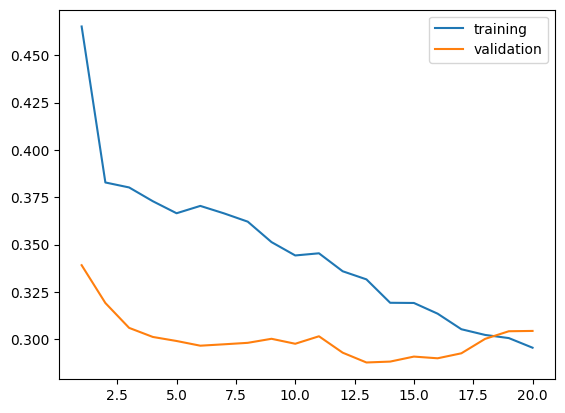

In [37]:
# Plotting train loss and Validation loss
plt.plot(range(1,21),his.history['loss'],label = 'training')
plt.plot(range(1,21),his.history['val_loss'],label = 'validation')
plt.legend()

### Predicting the model

In [38]:
predicted=model.predict(x_testp)
predicted=np.where(predicted>0.5,1,0)

2/2 [==============================] - 0s 3ms/step


### Evaluating the model


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted)) 

0.96


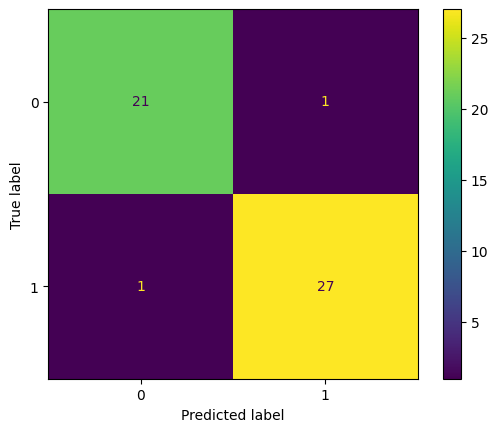

In [40]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

### PLOTING THE DECISION SURFACE
 

In [41]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

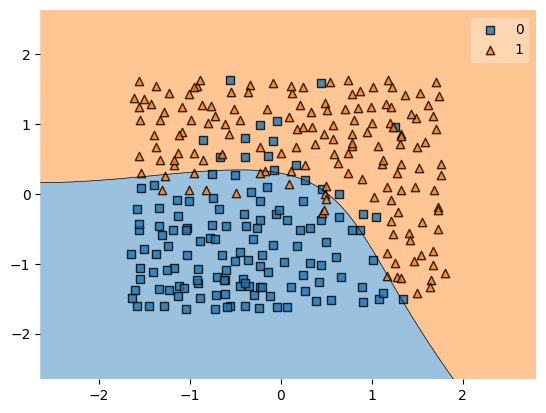

In [42]:
# Plotting decision Surface
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf = model)

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

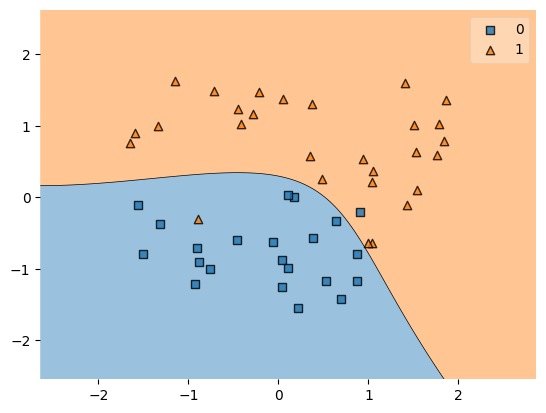

In [43]:
plot_decision_regions(x_testp,y_test.values,clf=model)  
